# Persiapan Data
Muat dataset training dan testing.

In [1]:
# Impor library yang dibutuhkan
import pandas as pd
import numpy as np

# Muat dataset training dan testing
try:
    df_train = pd.read_csv('data_training.csv')
    df_test = pd.read_csv('data_testing.csv')

    print("--- Dataset Berhasil Dimuat ---")

    # Tampilkan setiap dataset
    print("\nData Training (5 Baris Pertama):")
    print(df_train.head())

    print("\nData Testing (5 Baris Pertama):")
    print(df_test.head())

except FileNotFoundError:
    print("ERROR: Data tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")


--- Dataset Berhasil Dimuat ---

Data Training (5 Baris Pertama):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3             0.740         0.08             1.7      0.094   
1            8.1             0.575         0.22             2.1      0.077   
2           10.1             0.430         0.40             2.6      0.092   
3           12.9             0.500         0.55             2.8      0.072   
4            8.4             0.360         0.32             2.2      0.081   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  45.0  0.99576  3.24       0.50   
1                 12.0                  65.0  0.99670  3.29       0.51   
2                 13.0                  52.0  0.99834  3.22       0.64   
3                  7.0                  24.0  1.00012  3.09       0.68   
4                 32.0                  79.0  0.99640  3.30       0.72   

   alcohol  quality 

# Pembersihan dan Eksplorasi data
Periksa informasi dasar dan periksa missing value.

In [2]:
# Informasi dasar dan tipe data (termasuk non-null counts)
print("\n--- Info Data Training ---")
df_train.info()

print("\n--- Info Data Testing ---")
df_test.info()

# Periksa jumlah nilai yang hilang (Missing Values)
print("\n--- Pengecekan Missing Values ---")
print("Missing Values (Training):")
print(df_train.isnull().sum())

print("\nMissing Values (Testing):")
print(df_test.isnull().sum())

# Tampilkan statistik deskriptif untuk melihat skala data
print("\n--- Statistik Deskriptif (Training) ---")
print(df_train.describe())


--- Info Data Training ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB

--- Info Data Testing ---
<class 'pandas.core.fra

# Scaling Data

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

print("--- Scaling Data ---")

# Simpan Id dari data testing untuk file submission nanti
# Simpan juga Id dari data training jika diperlukan, tapi yang utama adalah test_ids
train_ids = df_train['Id']
test_ids = df_test['Id']

# Hapus kolom 'Id' dari kedua dataset karena bukan fitur, 'quality' juga akan dipisahkan dari df_train
df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

# Pisahkan fitur (X) dan target (y) dari data training
X_train = df_train.drop('quality', axis=1)
y_train = df_train['quality']

# Data testing (X_test) adalah df_test itu sendiri
X_test = df_test.copy()

# Pastikan urutan kolom di X_train dan X_test sama
X_test = X_test[X_train.columns]

print(f"Jumlah fitur: {len(X_train.columns)}")
print(f"Nama fitur: {list(X_train.columns)}")

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit (belajar) scaler hanya pada data training (X_train)
scaler.fit(X_train)

# Transform (ubah) data training dan testing menggunakan scaler yang sama
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame agar mudah dilihat, gunakan nama kolom asli
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\n--- Data Training Setelah Scaling (5 Baris Pertama) ---")
print(X_train_scaled_df.head())

print("\n--- Statistik Deskriptif Data Training Setelah Scaling ---")
print(X_train_scaled_df.describe())

print("\n--- Data Berhasil Disiapkan dan Discaling ---")

--- Scaling Data ---
Jumlah fitur: 11
Nama fitur: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

--- Data Training Setelah Scaling (5 Baris Pertama) ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.565527          1.176198    -0.960627       -0.623616   0.147259   
1      -0.095215          0.254705    -0.242789       -0.314200  -0.201873   
2       1.080565         -0.555092     0.680145        0.072570   0.106185   
3       2.726657         -0.164156     1.449257        0.227278  -0.304559   
4       0.081152         -0.946029     0.269952       -0.236846  -0.119725   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.561759             -0.030890 -0.490363 -0.480901  -0.936887   
1            -0.367478              0.600550  0.004342 -0.151932  -0.877102   
2            -0

# Pembuatan Model
Menggunakan Random Forest Classifier dengan Class Weighting agar model tetap memperhatikan kelas-kelas yang langka.

--- Model dengan Class Weighting ---
Data untuk evaluasi model (train): (685, 11)
Data untuk evaluasi model (validasi): (172, 11)

--- Melatih Model... ---
--- Model Selesai Dilatih ---

--- Hasil Evaluasi Model (Revisi) pada Data Validasi ---
Akurasi Model: 65.70%

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.70      0.84      0.76        73
           6       0.62      0.66      0.64        68
           7       0.50      0.27      0.35        22
           8       1.00      0.33      0.50         3

    accuracy                           0.66       172
   macro avg       0.47      0.35      0.38       172
weighted avg       0.63      0.66      0.63       172


Confusion Matrix:


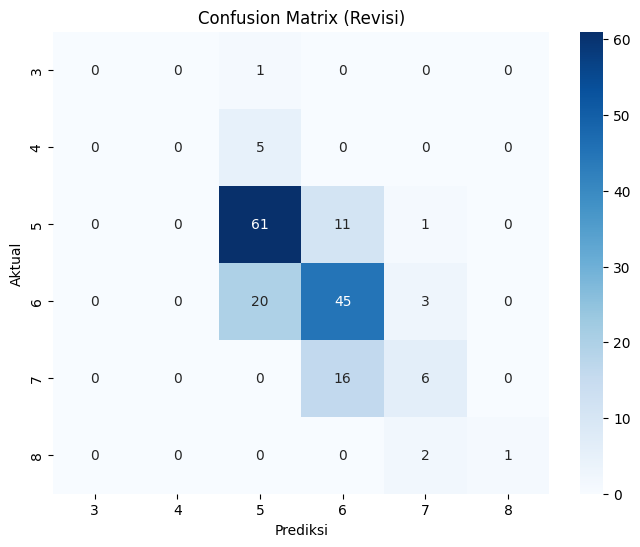

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# X_train_scaled_df adalah DataFrame hasil scaling
# y_train adalah target 'quality'

print("--- Model dengan Class Weighting ---")

# 1. Pisahkan data training menjadi set train (untuk melatih) dan set validasi (untuk menguji)
X_train_eval, X_val, y_train_eval, y_val = train_test_split(
    X_train_scaled_df,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print(f"Data untuk evaluasi model (train): {X_train_eval.shape}")
print(f"Data untuk evaluasi model (validasi): {X_val.shape}")

# Buat model klasifikasi (Random Forest Classifier)
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

# Latih model menggunakan data training (X_train_eval, y_train_eval)
print("\n--- Melatih Model... ---")
model.fit(X_train_eval, y_train_eval)
print("--- Model Selesai Dilatih ---")

# Lakukan prediksi pada data validasi (X_val)
y_pred_val = model.predict(X_val)

# Evaluasi Model
print("\n--- Hasil Evaluasi Model (Revisi) pada Data Validasi ---")

# Akurasi
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_val, zero_division=0))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, y_pred_val)

# Visualisasi Confusion Matrix
try:
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y_train.unique()),
                yticklabels=sorted(y_train.unique()))
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title('Confusion Matrix (Revisi)')
    plt.show()
except Exception as e:
    print(f"\nTidak bisa menampilkan plot: {e}. Lanjutkan tanpa plot.")
    print(cm)

# Prediksi Data Uji

Prediksi data uji menggunakan model setelah dilatih dan evaluasi.

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

print("--- Prediksi Data Uji ---")

# Definisikan Model Final
final_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

# Latih ulang model pada Seluruh data training
print("--- Melatih Model Final (menggunakan seluruh data training)... ---")
final_model.fit(X_train_scaled_df, y_train)
print("--- Model Final Selesai Dilatih ---")

# Lakukan prediksi pada data testing yang sudah di-scale
print("--- Melakukan Prediksi pada Data Testing... ---")
final_predictions = final_model.predict(X_test_scaled_df)

# Buat DataFrame hasil dengan format yang sesuai
# Kolom pertama: 'Id'
# Kolom kedua: 'quality' (hasil prediksi)
submission_df = pd.DataFrame({
    'Id': test_ids,
    'quality': final_predictions
})

# Tampilkan 5 baris pertama dari file hasil
print("\n--- 5 Baris Pertama Hasil Prediksi ---")
print(submission_df.head())

# Simpan hasil prediksi ke file CSV
NIM_TERAKHIR = "086"
file_name = f"hasilprediksi_{NIM_TERAKHIR}.csv"

# 'index=False' agar tidak ada kolom indeks tambahan
submission_df.to_csv(file_name, index=False)

print(f"\n--- Berhasil! ---")
print(f"Hasil prediksi telah disimpan ke: {file_name}")

--- Prediksi Data Uji ---
--- Melatih Model Final (menggunakan seluruh data training)... ---
--- Model Final Selesai Dilatih ---
--- Melakukan Prediksi pada Data Testing... ---

--- 5 Baris Pertama Hasil Prediksi ---
     Id  quality
0   222        5
1  1514        6
2   417        5
3   754        5
4   516        6

--- Berhasil! ---
Hasil prediksi telah disimpan ke: hasilprediksi_086.csv
